<a href="https://colab.research.google.com/github/Sarvesh2k03/Gender-representation-in-video-games/blob/main/gender_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages('ggplot2')
#install.packages('tidyverse')
#install.packages('dplyr')
#install.packages('sqldf')
#install.packages('scales')
#install.packages('jtools')
#install.packages('interactions')
#install.packages('MASS')
#install.packages('knitr')
#install.packages('proto')
#install.packages('gsubfn')


In [ ]:
library("ggplot2", warn.conflicts=FALSE)
library("tidyverse", warn.conflicts=FALSE)
library("dplyr", warn.conflicts=FALSE) #Using this to avail the PIPE operator to Clear out and subset between data-frames.
library("sqldf", warn.conflicts=FALSE)
library("scales", warn.conflicts=FALSE)
library("jtools", warn.conflicts=FALSE)
library("interactions", warn.conflicts=FALSE)
library("MASS", warn.conflicts=FALSE)
library("knitr", warn.conflicts=FALSE)
library("proto", warn.conflicts=FALSE)
library("gsubfn", warn.conflicts=FALSE)

In [ ]:
#Importing the data from Dataset.

Characters <- read.csv('characters.grivg.csv')
Games <- read.csv('games.grivg.csv')
sexualization <- read.csv('sexualization.grivg.csv')

head(Characters)
head(Games)
head(sexualization)

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
2,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
3,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
4,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
5,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No
6,Oleana,Female,PSS,Adult,Adult,0,0,PSS_Oleana,Human,A,SC,No


,Game_Id,Title,Release,Series,Genre,Sub.genre,Developer,Publisher,Country,Platform,⋯,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,GTAV,Grand Theft Auto V,Nov-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,⋯,M,7,0,0%,9.7,9.0,10.0,9,9.4,NA
2,PSS,Pokémon Sword/Shield,Nov-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,⋯,M,9,1,11%,8.0,7.0,9.3,9,8.3,NA
3,CODMW,Call of Duty: Modern Warfare,Oct-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,⋯,M,11,0,0%,8.0,8.0,8.0,7,7.8,NA
4,RDR2,Red Dead Redemption 2,Dec-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,⋯,M,7,0,0%,9.7,9.5,10.0,9,9.6,NA
5,SMO,Super Mario Odyssey,Oct-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,⋯,M,11,1,9%,9.7,9.5,10.0,10,9.8,NA
6,BOTW,The Legend of Zelda: Breath of the Wild,Mar-17,The Legend of Zelda,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Multi,⋯,M,8,0,0%,9.7,10.0,10.0,10,9.9,NA


,Id,Sexualized_clothing,Trophy,Damsel.in.Distress,Sexualized.Cutscenes,Total
,<chr>,<int>,<int>,<int>,<int>,<int>
1,CODMW_Farah,0,0,0,0,0
2,PSS_Protagonist,0,0,0,0,0
3,PSS_Magnolia,0,0,0,0,0
4,PSS_Sonia,0,0,0,0,0
5,PSS_Marnie,0,0,0,0,0
6,PSS_Oleana,0,0,0,0,0


In [ ]:
#renaming column name 'game' to 'game_id' which will later be used for merging

Characters <- rename(Characters,Game_Id=Game)

head(Characters)


,Name,Gender,Game_Id,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
2,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
3,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
4,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
5,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No
6,Oleana,Female,PSS,Adult,Adult,0,0,PSS_Oleana,Human,A,SC,No


In [ ]:
#merging the two columns Characters and Games of unequal column length (with the argument all.x=TRUE)

CG <- merge(Characters, Games, by = c('Game_Id'), all.x= TRUE)

head(CG)

,Game_Id,Name,Gender,Age,Age_range,Playable,Sexualization,Id,Species,Side,⋯,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,BB,Hunter,Custom,Adult,Adult,1,0,BB_Hunter,Human,P,⋯,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NA
2,BB,Micolash,Male,Unknown,Unknown,0,0,BB_Micolash,Human,A,⋯,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NA
3,BB,Doll,Female,Unknown,Unknown,0,0,BB_Doll,Humanoid,P,⋯,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NA
4,BB,Gascoigne,Male,Unknown,Unknown,0,0,BB_Gascoigne,Human,A,⋯,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NA
5,BB,Gahrman,Male,Elderly,Elderly,0,0,BB_Gahrman,Human,B,⋯,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NA
6,BL2,Angel Guardian,Female,Adult,Adult,0,1,BL2_Angel,Human,B,⋯,M,7,0,0%,8.1,8.5,9.0,8.5,8.5,NA


In [ ]:
#merging the combined column(CG) with sexualization using the common 'id' column

CGS <- merge(CG, sexualization, by=c('Id'),all.x=TRUE)

head(CGS)


,Id,Game_Id,Name,Gender,Age,Age_range,Playable,Sexualization,Species,Side,⋯,Destructoid,IGN,GameSpot,Avg_Reviews,X,Sexualized_clothing,Trophy,Damsel.in.Distress,Sexualized.Cutscenes,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<int>,<int>,<int>,<int>
1,BB_Doll,BB,Doll,Female,Unknown,Unknown,0,0,Humanoid,P,⋯,9.0,9.1,9.0,9.1,NA,0,0,0,0,0
2,BB_Gahrman,BB,Gahrman,Male,Elderly,Elderly,0,0,Human,B,⋯,9.0,9.1,9.0,9.1,NA,0,0,0,0,0
3,BB_Gascoigne,BB,Gascoigne,Male,Unknown,Unknown,0,0,Human,A,⋯,9.0,9.1,9.0,9.1,NA,0,0,0,0,0
4,BB_Hunter,BB,Hunter,Custom,Adult,Adult,1,0,Human,P,⋯,9.0,9.1,9.0,9.1,NA,0,0,0,0,0
5,BB_Micolash,BB,Micolash,Male,Unknown,Unknown,0,0,Human,A,⋯,9.0,9.1,9.0,9.1,NA,0,0,0,0,0
6,BL2_Angel,BL2,Angel Guardian,Female,Adult,Adult,0,1,Human,B,⋯,8.5,9.0,8.5,8.5,NA,0,0,1,0,1


In [ ]:
##Data-cleaning

#Removing the unwanted columns using the 'PIPE' operator

CGS <- CGS %>%
  dplyr::select(-c(Id, Game_Id, Name, Age, Romantic_Interest, Title, Series, Sub.genre, Developer, Customizable_main, Protagonist,Protagonist_Non_Male, Total_team, female_team, Metacritic, Destructoid, IGN, GameSpot, X, Trophy, Total))

head(CGS)
summary(CGS)

#removing '%' from percentage values

CGS$Percentage_non_male <- as.numeric(sub("%","",CGS$Percentage_non_male))
CGS$Team_percentage <- as.numeric(sub("%","",CGS$Team_percentage))

summary(CGS)

#changing the month'-' value with '20' to make it a year (like 2021)

CGS$Release <- as.numeric(str_replace(CGS$Release,substr(CGS$Release,1,4),"20"))
head(CGS)
sum(is.na(CGS$Relevance))


,Gender,Age_range,Playable,Sexualization,Species,Side,Relevance,Release,Genre,Publisher,⋯,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Team_percentage,Avg_Reviews,Sexualized_clothing,Damsel.in.Distress,Sexualized.Cutscenes
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,Female,Unknown,0,0,Humanoid,P,SC,Mar-15,RPG,Sony Computer Entertainment,⋯,3,2,40%,TR,M,0%,9.1,0,0,0
2,Male,Elderly,0,0,Human,B,MC,Mar-15,RPG,Sony Computer Entertainment,⋯,3,2,40%,TR,M,0%,9.1,0,0,0
3,Male,Unknown,0,0,Human,A,SC,Mar-15,RPG,Sony Computer Entertainment,⋯,3,2,40%,TR,M,0%,9.1,0,0,0
4,Custom,Adult,1,0,Human,P,PA,Mar-15,RPG,Sony Computer Entertainment,⋯,3,2,40%,TR,M,0%,9.1,0,0,0
5,Male,Unknown,0,0,Human,A,MA,Mar-15,RPG,Sony Computer Entertainment,⋯,3,2,40%,TR,M,0%,9.1,0,0,0
6,Female,Adult,0,1,Human,B,MC,Sep-12,Action,2K Games,⋯,8,4,33%,MS,M,0%,8.5,0,1,0


    Gender           Age_range            Playable      Sexualization    
 Length:637         Length:637         Min.   :0.0000   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.00000  
                                       Mean   :0.1931   Mean   :0.08634  
                                       3rd Qu.:0.0000   3rd Qu.:0.00000  
                                       Max.   :1.0000   Max.   :3.00000  
   Species              Side            Relevance           Release         
 Length:637         Length:637         Length:637         Length:637        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

    Gender           Age_range            Playable      Sexualization    
 Length:637         Length:637         Min.   :0.0000   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.00000  
                                       Mean   :0.1931   Mean   :0.08634  
                                       3rd Qu.:0.0000   3rd Qu.:0.00000  
                                       Max.   :1.0000   Max.   :3.00000  
   Species              Side            Relevance           Release         
 Length:637         Length:637         Length:637         Length:637        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

,Gender,Age_range,Playable,Sexualization,Species,Side,Relevance,Release,Genre,Publisher,⋯,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Team_percentage,Avg_Reviews,Sexualized_clothing,Damsel.in.Distress,Sexualized.Cutscenes
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
1,Female,Unknown,0,0,Humanoid,P,SC,2015,RPG,Sony Computer Entertainment,⋯,3,2,40,TR,M,0,9.1,0,0,0
2,Male,Elderly,0,0,Human,B,MC,2015,RPG,Sony Computer Entertainment,⋯,3,2,40,TR,M,0,9.1,0,0,0
3,Male,Unknown,0,0,Human,A,SC,2015,RPG,Sony Computer Entertainment,⋯,3,2,40,TR,M,0,9.1,0,0,0
4,Custom,Adult,1,0,Human,P,PA,2015,RPG,Sony Computer Entertainment,⋯,3,2,40,TR,M,0,9.1,0,0,0
5,Male,Unknown,0,0,Human,A,MA,2015,RPG,Sony Computer Entertainment,⋯,3,2,40,TR,M,0,9.1,0,0,0
6,Female,Adult,0,1,Human,B,MC,2012,Action,2K Games,⋯,8,4,33,MS,M,0,8.5,0,1,0


[1] 0

In [ ]:
#changing all capitalized values to lowercase values, replacing the gaps, punctuation with '_'

names(CGS) <- tolower(names(CGS))

CGSCleaned<- function(col) {
  if(is.character(col)){
    col <- tolower(col)
    col <- gsub("[[:punct:][:space:]]",'_',col)
  }
  print(col)
}

CGS <- CGS %>%
  mutate_all(CGSCleaned) #try lapply/sapply

summary(CGS)

  [1] "female"     "male"       "male"       "custom"     "male"      
  [6] "female"     "male"       "male"       "male"       "female"    
 [11] "female"     "male"       "male"       "male"       "female"    
 [16] "male"       "male"       "male"       "male"       "male"      
 [21] "male"       "male"       "female"     "male"       "male"      
 [26] "male"       "female"     "male"       "male"       "female"    
 [31] "male"       "male"       "female"     "male"       "female"    
 [36] "male"       "male"       "male"       "male"       "male"      
 [41] "female"     "male"       "female"     "female"     "female"    
 [46] "male"       "female"     "male"       "female"     "male"      
 [51] "female"     "male"       "male"       "female"     "female"    
 [56] "male"       "female"     "non_binary" "male"       "female"    
 [61] "male"       "male"       "female"     "male"       "male"      
 [66] "male"       "male"       "male"       "female"     "female"    
 [71] 

    gender           age_range            playable      sexualization    
 Length:637         Length:637         Min.   :0.0000   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.00000  
                                       Mean   :0.1931   Mean   :0.08634  
                                       3rd Qu.:0.0000   3rd Qu.:0.00000  
                                       Max.   :1.0000   Max.   :3.00000  
   species              side            relevance            release    
 Length:637         Length:637         Length:637         Min.   :2012  
 Class :character   Class :character   Class :character   1st Qu.:2014  
 Mode  :character   Mode  :character   Mode  :character   Median :2017  
                                                          Mean   :2017  
                                                          3rd Qu.:2019  
                                            

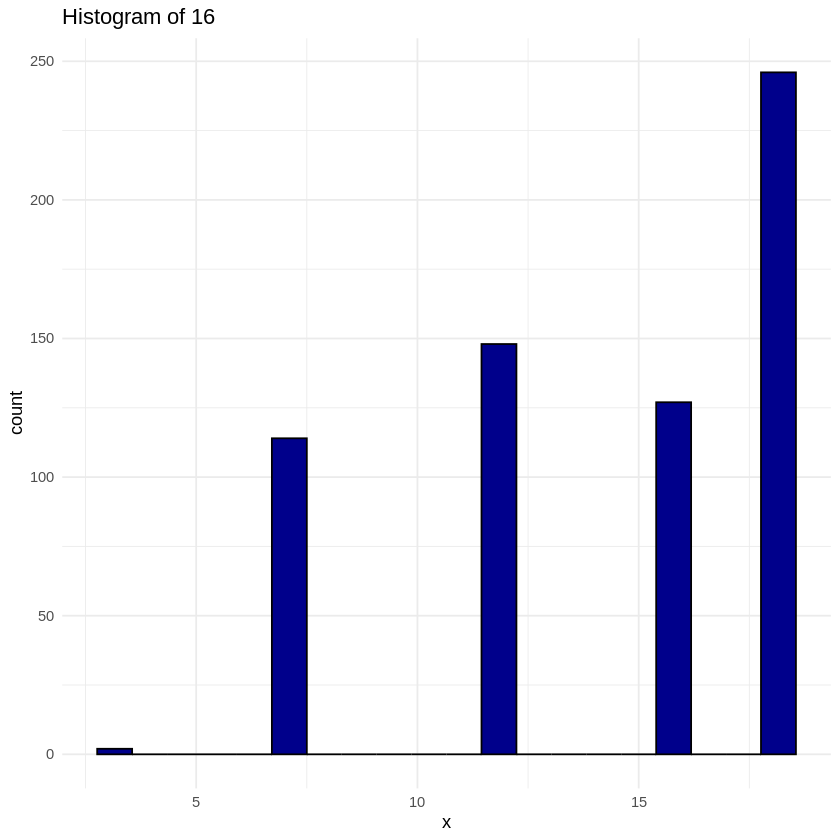

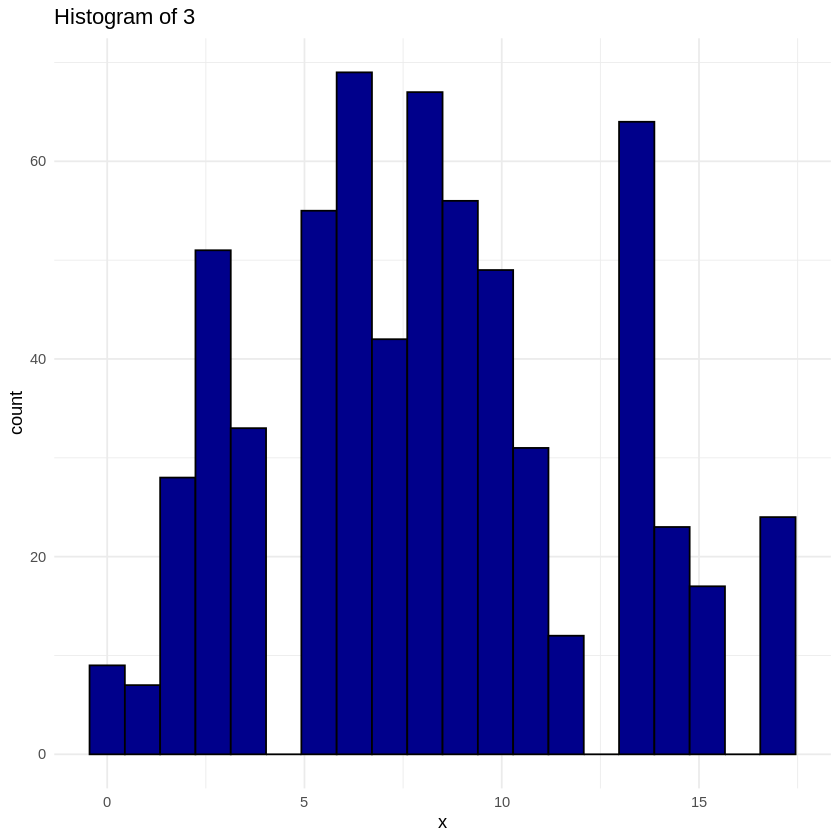

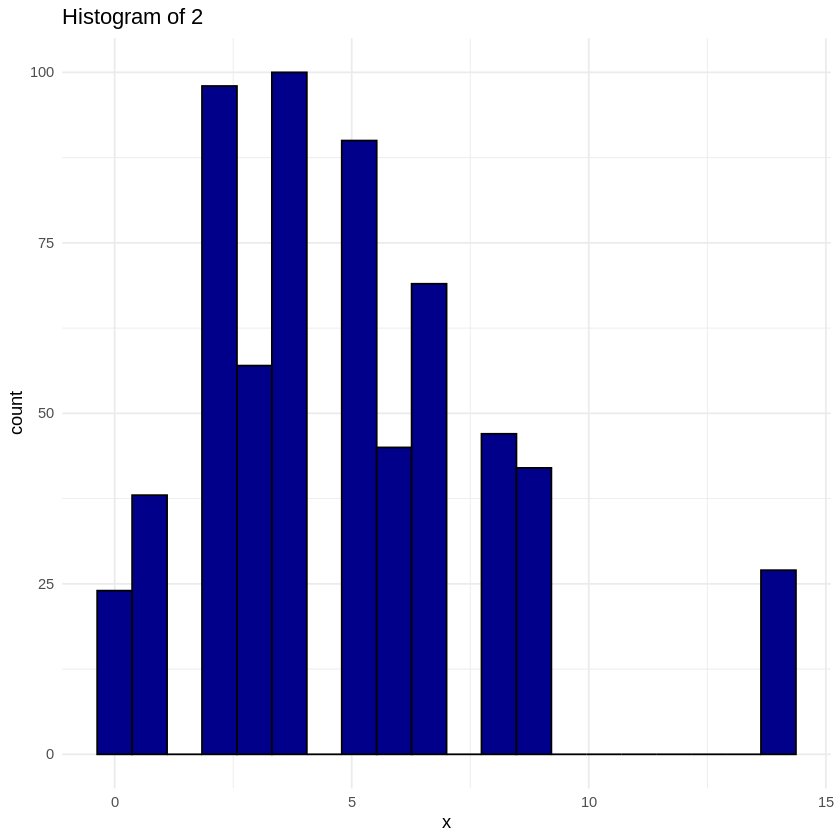

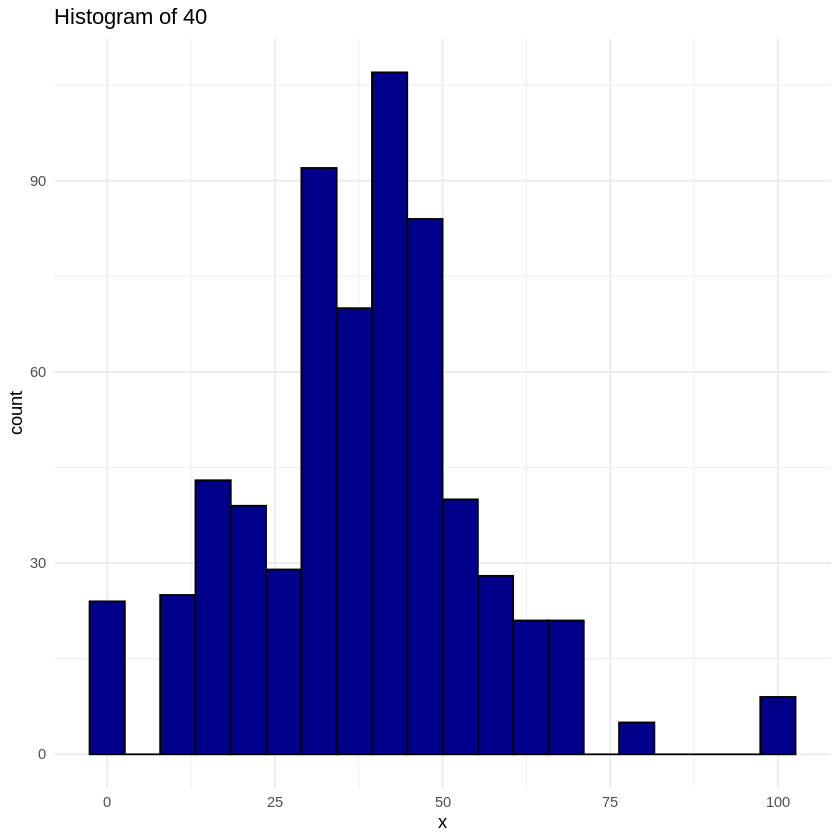

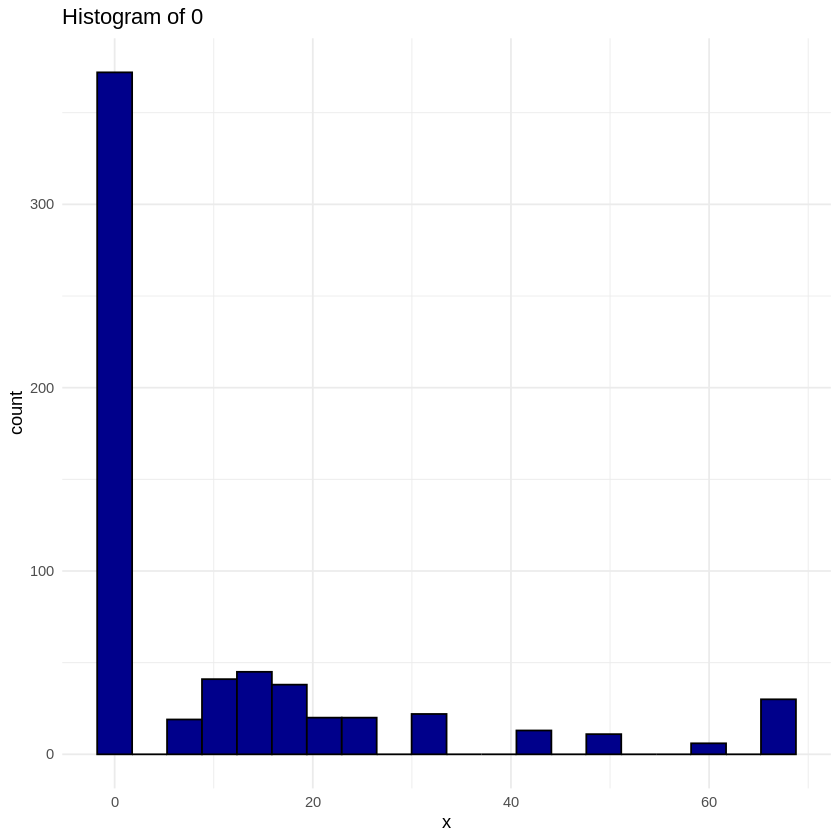

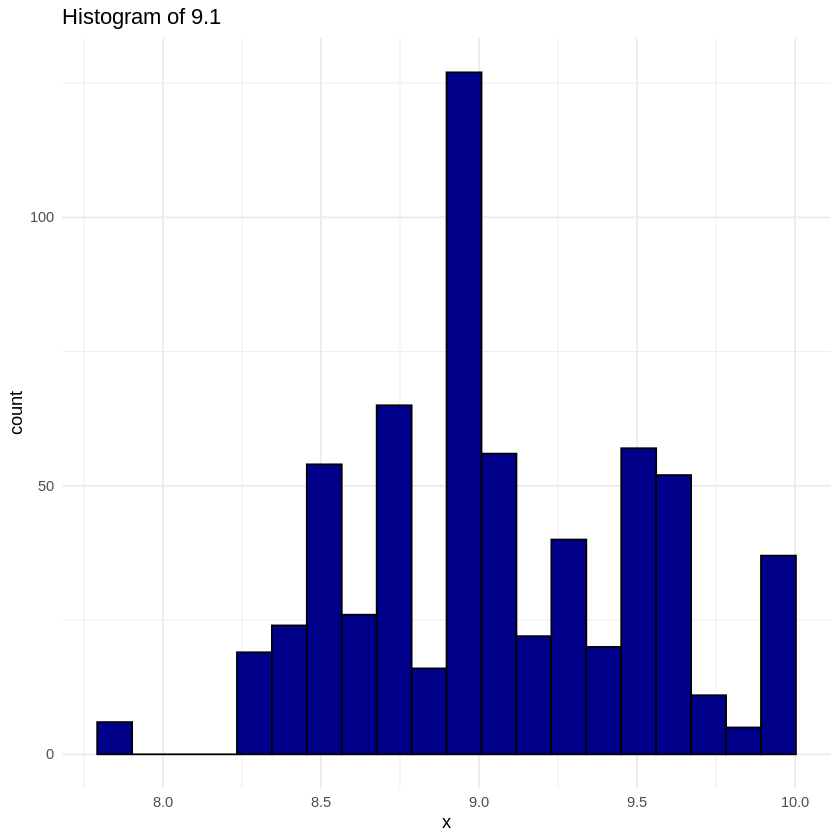

In [ ]:
 ##end-data-cleaning

  ##EDA

  numeric_vars <- CGS[,c(13,14,15,16,19,20)]

#categorical_vars <- names(CGS)[sapply(CGS, is.factor)]

for (column in numeric_vars) {
  hist_plot <- ggplot(CGS, aes_string(x = column)) +
    geom_histogram(fill = "darkblue", color = "black", bins = 20) +
    ggtitle(paste("Histogram of", column)) +
    theme_minimal()

  print(hist_plot)
}




##end-exploratory-data-analysis

In [ ]:
#selecting protagonist with gender

protagonist_side <- sqldf("select gender from CGS where side='p';")

head(protagonist_side)

separated_ps <- protagonist_side %>%
  group_by(gender) %>%
  summarise(n=n())
head(separated_ps)


In [ ]:
#using pie chart for visualization with scales package to represent 'percent'
pie(separated_ps$n,labels = percent(separated_ps$n / sum(separated_ps$n)),border='blue',main='pie-chart: %Gender v/s Protagonist',col = c("#1f78b4", "#33a02c", "#b3cde3", "#e5f5e0"))
legend("topleft", legend=separated_ps$gender,fill=c("#1f78b4", "#33a02c", "#b3cde3", "#e5f5e0"),cex = 0.7)


#female population is represented with 35.9% of total when associated with protagonists.
#In majority, Non-female characters are majorly associated with protagonists.

###end-question--------------------------------------------------------------------------------------

In [ ]:
###Is there any noticeable correlation between the "Sexualization" of women characters and their "Side"?
# Question 2
#Changing the values - 0,1,2,3 to no,low,moderate & High sexualization for better understanding.

CGS$sexualization <- replace(CGS$sexualization, CGS$sexualization %in% c(0,1,2,3),c('no_sexualization','slight_sexualization','moderate_sexualization','high_sexualization'))
head(CGS)

side_sexualization <- data.frame(CGS$sexualization,CGS$side)
table(side_sexualization)
print(chisq.test(table(side_sexualization)))

###end-question--------------------------------------------------------------------------------------

In [ ]:
#How does the representation of women characters vary across different "Countries" and "Platforms" in video games?
# Question 3

attach(CGS)

women <- sqldf("select platform, country from CGS where gender = 'female' ")
women_count <- table(women$platform,women$country)

barplot(women_count,col=c("Red", "Blue", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown", "black", "Gray", "Violet" ),ylab="Count ( women ) ", xlab="Country",beside=TRUE)

legend('topleft',legend=rownames(women_count),cex=0.69,fill=c("Red", "Blue", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown", "black", "Gray", "Violet" ),text.width=10)


###end-question--------------------------------------------------------------------------------------

In [ ]:
###Are there any discernible patterns in the reception and representation of women characters based on "Avg_Reviews" and "Country" or "Platform"?
# Question 4

female_genre <- sqldf("select genre from CGS where gender='female';")
barplot(table(female_genre),col=c('#000000','#282625','#4A4745','#77736E','#A7A3A0','#D5D4D2'),main='barplot of female distribution based on genre')

###end-question--------------------------------------------------------------------------------------

In [ ]:
# What genres of video games tend to prioritize or feature a higher
# representation of women characters?
# Question 5

gender.genre <- data.frame(gender = CGS$gender, genre = CGS$genre)

ggplot(gender.genre, aes(x = gender)) +
  geom_bar(aes(group = genre, fill = genre), position = "dodge") +
  ggtitle("Gender by Genre") + labs(x = "Gender")


###end-question---------------------------------------------------------------

In [ ]:
# correlation between % of women in team and sexualization of female characters
#Question 6

ggplot(CGS, aes(x = team_percentage, y = sexualization, col = director)) +
  geom_point() +
  ggtitle("% of female team members vs # of misogynistic tropes") +
  labs(x = "% of women in game's team", y = "# of misogynistic tropes per character")

###end-question---------------------------------------------------------------

In [ ]:
#  How has the representation of women characters in video games evolved over different "Release" years?
# Question 7

gender.release <- data.frame(gender = CGS$gender, release = CGS$release)

yearName <- paste0('year', gender.release$release)
year.split <- split(gender.release, yearName)

table12 <- table(year.split$year2012$gender)
table13 <- table(year.split$year2013$gender)
table14 <- table(year.split$year2014$gender)
table15 <- table(year.split$year2015$gender)
table16 <- table(year.split$year2016$gender)
table17 <- table(year.split$year2017$gender)
table18 <- table(year.split$year2018$gender)
table19 <- table(year.split$year2019$gender)
table20 <- table(year.split$year2020$gender)
table21 <- table(year.split$year2021$gender)
table22 <- table(year.split$year2022$gender)

year.data <- data.frame(m = c(as.numeric(table12)[2], as.numeric(table13)[2],
                              as.numeric(table14)[3], as.numeric(table15)[3],
                              as.numeric(table16)[3], as.numeric(table17)[3],
                              as.numeric(table18)[2], as.numeric(table19)[3],
                              as.numeric(table20)[2], as.numeric(table21)[2],
                              as.numeric(table22)[3]),
                        f = c(as.numeric(table12)[1], as.numeric(table13)[1],
                              as.numeric(table14)[2], as.numeric(table15)[2],
                              as.numeric(table16)[2], as.numeric(table17)[2],
                              as.numeric(table18)[1], as.numeric(table19)[2],
                              as.numeric(table20)[1], as.numeric(table21)[1],
                              as.numeric(table22)[2]),
                        nb = c(as.numeric(table12)[3], as.numeric(table13)[3],
                               as.numeric(table14)[4], as.numeric(table15)[4],
                               0, as.numeric(table17)[4], as.numeric(table18)[3],
                               0, as.numeric(table20)[3], as.numeric(table21)[3],
                               as.numeric(table22)[4]),
                        c = c(0, 0, as.numeric(table14)[1],
                              as.numeric(table15)[1], as.numeric(table16)[1],
                              as.numeric(table17)[1], 0, as.numeric(table19)[1],
                              0, 0, as.numeric(table22)[1]),
                        years = c(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
                                  2020, 2021, 2022))

ggplot(year.data) + geom_line(aes(x = years, y = m, col = "male")) +
  geom_line(aes(x = years, y = f, col = "female")) +
  geom_line(aes(x = years, y = nb, col = "non-binary")) +
  geom_line(aes(x = years, y = c, col = "custom")) +
  ggtitle("Gender representation vs Years") +
  labs(y = "Frequency of Gender", x = "Years")

###end-question---------------------------------------------------------------

In [ ]:
# Are there noticeable trends in the portrayal of women characters, and how do these trends align with changes in "Avg_Reviews" over time?
#Question 8

ggplot(CGS, aes(x = release)) +
  geom_bar(aes(group = sexualization, fill = sexualization)) +
  ggtitle("Sexualization by year")
###end-question---------------------------------------------------------------

In [ ]:
##Understanding the relationship between different 'categorical' variables using "Interactions"

library(jtools)

#Categorizing the many variables into consolidated range
CGS<- CGS[CGS$age_range != 'infant',]
CGS$age_range[CGS$age_range=='child' | CGS$age_range=='teenager'] <- 'minors'
CGS$age_range[CGS$age_range=='young_adult' | CGS$age_range=='adult'] <- 'adults'
CGS$age_range[CGS$age_range=='elderly' | CGS$age_range=='middle_aged'] <- 'old'

CGS$gender <- factor(CGS$gender)
CGS$sexualization <- factor(CGS$sexualization)
CGS$age_range <- factor(CGS$age_range)

#fitting the variables with interactions as a linear model
fit_gsa <- lm(percentage_non_male ~ gender * sexualization, data=CGS)
summ(fit_gsa)

cat_plot(fit_gsa, pred = gender, modx = sexualization,plot.points = TRUE)

In [ ]:
##understanding the relation between sexualization with platform, average reviews and relevance.
#fitting a linear model
model <- lm(sexualization ~ platform + avg_reviews, data = CGS)
model


In [ ]:
##understanding the relation between sexualized clothing with platform, average review and relevance.
##Applying a binary logistic model while fitting with a generalised linear model.

platform_df <- as.factor(platform)

logistic_model <- glm(CGS$sexualized_clothing ~ CGS$platform+ avg_reviews + relevance,
                      family = binomial, data = CGS)

summary(logistic_model)

AIC(logistic_model)

BIC(logistic_model)

plot(logistic_model)

In [ ]:
#performing analysis of variances between age range and average reviews to check if the mean average reviews are equal across all age range.

model_anova <- lm(avg_reviews ~ age_range, data = CGS)
anova(model_anova)

summary(model_anova)

#since the p-value is less than 0.5, the hull hypothesis can be rejected. This means that at least one age range has a different mean average reviews.

In [ ]:
#fitting a logistic regression model to predict the cumulative odds of the different categories of an ordinal response variable (pegi rating) based on several other predictors (gender, age range, playable)

model_for_pegi <- polr(factor(pegi) ~ gender + age_range + playable, data = CGS)
summary(model_for_pegi)